In this Predictive Analytics Project, we will try to answer the question "how casual riders and annual members use Cyclistic bikes differently?" and try to predict if a rider is casual or member using features such as ride length and duration.

If the model is able to predict the category with a decent accuracy, we can confirm that member and casual riders use the Cyclistic bikes differently and the model is able to differentiate. Hence, our end goal is not the prediction the category and results, but to test the hypothesis that member and casual riders use the bike service differently.

Let's go.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import dataset
dataset = pd.read_csv("Divvy_Trips_2020_Q1.csv")

### Dataset information

In [3]:
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             426887 non-null  object 
 1   rideable_type       426887 non-null  object 
 2   started_at          426887 non-null  object 
 3   ended_at            426887 non-null  object 
 4   start_station_name  426887 non-null  object 
 5   start_station_id    426887 non-null  int64  
 6   end_station_name    426886 non-null  object 
 7   end_station_id      426886 non-null  float64
 8   start_lat           426887 non-null  float64
 9   start_lng           426887 non-null  float64
 10  end_lat             426886 non-null  float64
 11  end_lng             426886 non-null  float64
 12  member_casual       426887 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 42.3+ MB
None


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member


In [4]:
dataset.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,426887.000000,426886.000000,426887.000000,426887.000000,426886.000000,426886.000000
mean,209.797799,209.337947,41.897846,-87.644157,41.897998,-87.644254
std,163.222889,163.198129,0.038080,0.022666,0.038315,0.022662
min,2.000000,2.000000,41.736600,-87.774700,41.736600,-87.774700
25%,77.000000,77.000000,41.880300,-87.655000,41.880300,-87.655500
50%,176.000000,175.000000,41.890600,-87.639900,41.890600,-87.640800
75%,298.000000,297.000000,41.915700,-87.629500,41.916000,-87.629500
max,675.000000,675.000000,42.064900,-87.549400,42.064900,-87.549400


# Feature Engineering and Preprocessing

### Null check

In [5]:
# checking for null values
dataset.isnull().any(axis = 0)

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name    False
start_station_id      False
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [6]:
# get the number of null values in the column end_station_name
print('null values in the column end_station_name - ',dataset["end_station_name"].isnull().sum())

# get the number of null values in the column end_station_id
print('null values in the column end_station_id - ',dataset["end_station_id"].isnull().sum())

# get the number of null values in the column end_lat
print('number of null values in the column end_lat - ',dataset["end_lat"].isnull().sum())

# get the number of null values in the column end_lng
print('number of null values in the column end_lng - ',dataset["end_lng"].isnull().sum())

# record that has the null values
dataset[dataset["end_station_name"].isnull()]

null values in the column end_station_name -  1
null values in the column end_station_id -  1
number of null values in the column end_lat -  1
number of null values in the column end_lng -  1


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
414426,157EAA4C4A3C8D36,docked_bike,2020-03-16 11:23:36,2020-03-16 11:23:24,HQ QR,675,NaN,NaN,41.8899,-87.6803,NaN,NaN,casual


One record out of 426887 records has null values for end station variables. The best approach here is to remove the record since it is non-comparable with the total number of records.

In [7]:
# index of the record that has null values
print('index of the record that has null values - ',dataset[dataset["end_station_name"].isnull()].index[0])

# Shape of the dataset
print('Shape of the dataset - ',dataset.shape)

# Delete the record containg null value
dataset = dataset.drop(labels = 414426,axis = 0)

# Shape of the dataset after removal of record
print('Shape of the dataset removal of record - ',dataset.shape)

index of the record that has null values -  414426
Shape of the dataset -  (426887, 13)
Shape of the dataset removal of record -  (426886, 13)


In [8]:
# Datatype of columns in DataFrame
dataset.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

### Datatype check

In [9]:
# started_at and ended_at should be datatime format
dataset["started_at"] = dataset["started_at"].astype("datetime64")
dataset["ended_at"] = dataset["ended_at"].astype("datetime64")

In [10]:
# end station id should be an int
dataset["end_station_id"] = dataset["end_station_id"].apply(pd.to_numeric)

# converting to numeric using apply(pd.to_numeric) didnt work
# So we have to look for alternative options
# View data in the column end_station_id
dataset["end_station_id"]

0         326.0
1         318.0
2         117.0
3          24.0
4         212.0
          ...  
426882    675.0
426883    240.0
426884    210.0
426885    264.0
426886     85.0
Name: end_station_id, Length: 426886, dtype: float64

In [11]:
# datatype of end station id is coming as decimal. But it should be int. we will do a bit of analysis on the column 
# to check if there are any anomalies in the column or we can convert it to int straight away.
tempvar_end_station_id = dataset["end_station_id"].astype("str")
tempvar_end_station_id

# sum of all the decimal points are 0. Which means that there are no anomalies and we can convert the column to int.
np.sum(tempvar_end_station_id.str.split(".").str[1].astype("int"))

# Convert float to int
dataset["end_station_id"] = dataset["end_station_id"].astype("int")

In [12]:
dataset.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id               int64
end_station_name              object
end_station_id                 int32
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [13]:
# distinct values present in the columns
print('rideable_type - ',dataset["rideable_type"].unique()[0])
print('member_casual - ',dataset["member_casual"].unique())

rideable_type -  docked_bike
member_casual -  ['member' 'casual']


### Add calculated columns

In [14]:
# create calculated columns for distance covered per ride and time taken for ride
# distance covered
def find_distance(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


dataset['distance_covered'] = find_distance(dataset.start_lat, dataset.start_lng,
                 dataset.end_lat, dataset.end_lng)

In [15]:
# time taken for the ride
dataset["time_taken"] = dataset["ended_at"] - dataset["started_at"]
dataset["time_taken"]

0        0 days 00:07:31
1        0 days 00:03:43
2        0 days 00:02:51
3        0 days 00:08:49
4        0 days 00:05:32
               ...      
426882   0 days 00:00:01
426883   0 days 00:48:08
426884   0 days 00:25:51
426885   0 days 00:10:33
426886   0 days 00:28:30
Name: time_taken, Length: 426886, dtype: timedelta64[ns]

# Exploratory Analysis and Viz

In [16]:
dataset.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_covered,time_taken
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member,1.737499,0 days 00:07:31
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member,0.833411,0 days 00:03:43
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member,0.620437,0 days 00:02:51
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member,1.231236,0 days 00:08:49
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member,0.783624,0 days 00:05:32


### Total distance covered by the member and casual categories

In [17]:
member_casual_distance_pivot = dataset.pivot_table(index = "member_casual", values = 'distance_covered', aggfunc = "sum")
member_casual_distance_pivot

,distance_covered
member_casual,
casual,94381.172920
member,695449.369934


Text(0, 0.5, 'Distance Covered')

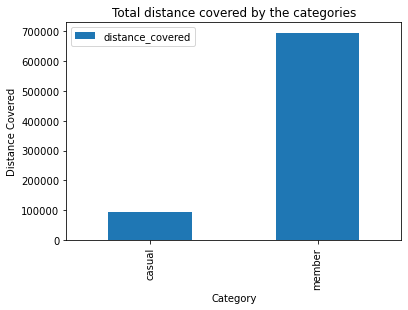

In [18]:
# Visualize
plot = member_casual_distance_pivot.plot(kind = "bar")
plot.set_title('Total distance covered by the categories')
plot.set_xlabel('Category')
plot.set_ylabel('Distance Covered')

Total distance covered by member subscribers is more than seven times that of casual riders.

### Total ride duration by the member and casual categories

In [19]:
member_casual_time_pivot = dataset.pivot_table(index = "member_casual", values = 'time_taken', aggfunc = "sum")
member_casual_time_pivot

,time_taken
member_casual,
casual,3224 days 16:22:47
member,3331 days 07:48:07


Text(0, 0.5, 'Total Duration')

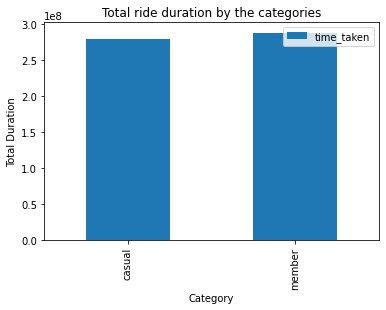

In [20]:
# Visualize
plot = member_casual_time_pivot.astype('timedelta64[s]').plot(kind = "bar")
plot.set_title('Total ride duration by the categories')
plot.set_xlabel('Category')
plot.set_ylabel('Total Duration')

Total time spent by both categories are comparable.

### Total number of rides by the member and casual categories

In [21]:
member_casual_count_pivot = dataset.pivot_table(index = "member_casual", values = 'ride_id', aggfunc = "count")
member_casual_count_pivot

,ride_id
member_casual,
casual,48479
member,378407


Text(0, 0.5, 'Total rides')

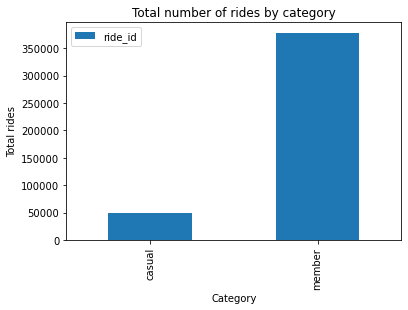

In [22]:
# Visualize
plot = member_casual_count_pivot.plot(kind = "bar")
plot.set_title('Total number of rides by category')
plot.set_xlabel('Category')
plot.set_ylabel('Total rides')

member riders covered almost seven times the distance that of casual riders

### Average distance covered by the member and casual categories

In [23]:
member_casual_average_distance_pivot = dataset.pivot_table(index = "member_casual", values = "distance_covered", aggfunc = "mean")
member_casual_average_distance_pivot

,distance_covered
member_casual,
casual,1.946847
member,1.837834


Text(0, 0.5, 'Distance Covered')

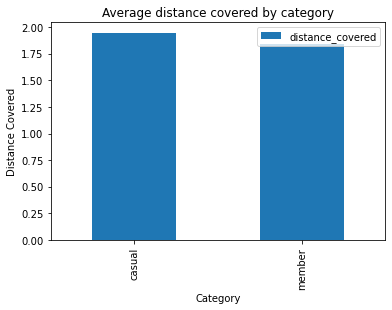

In [24]:
# Visualize
plot = member_casual_average_distance_pivot.plot(kind = "bar")
plot.set_title('Average distance covered by category')
plot.set_xlabel('Category')
plot.set_ylabel('Distance Covered')

Average distance covered by both casual riders and member riders are comparable

### Average time spent by the member and casual categories

In [25]:
member_casual_average_distance_pivot = dataset.pivot_table(index = "member_casual", values = "time_taken", aggfunc = "mean")
member_casual_average_distance_pivot

,time_taken
member_casual,
casual,0 days 01:35:47.077435590
member,0 days 00:12:40.626751090


Text(0, 0.5, 'Average time (Mins)')

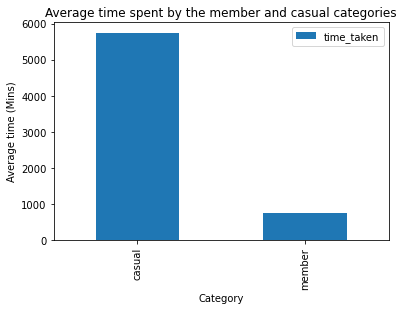

In [26]:
# Visualize
plot = member_casual_average_distance_pivot.astype('timedelta64[s]').plot(kind = "bar")
plot.set_title('Average time spent by the member and casual categories')
plot.set_xlabel('Category')
plot.set_ylabel('Average time (Mins)')

It is clear from the exploratory analysis that casual users and member users use the service differently.

Even though the average and sum of ride length are comparable for two categories, casual riders use the service for long duration rides whereas member users use the service for short duration rides more efficiently.

### Additional metrics

In [27]:
## How the number of rides per month changed over time
dataset_day_rides_pivot = dataset.pivot_table(index = dataset.started_at.astype('datetime64[D]'), values = "member_casual", aggfunc = "count")

[]

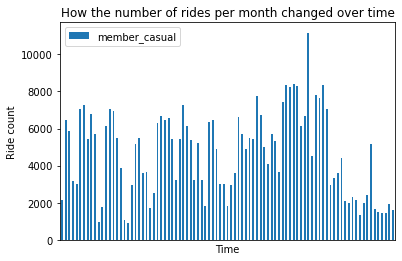

In [28]:
plot = dataset_day_rides_pivot.plot(kind = 'bar')
plot.set_title('How the number of rides per month changed over time')
plot.set_xlabel('Time')
plot.set_ylabel('Ride count')
plot.set_xticks([])

In [29]:
## Number of rides per month
dataset_month_rides_pivot = dataset.pivot_table(index = dataset.started_at.astype('datetime64[M]'), values = "member_casual", aggfunc = "count")

[Text(0, 0, 'Jan'), Text(1, 0, 'Feb'), Text(2, 0, 'Mar')]

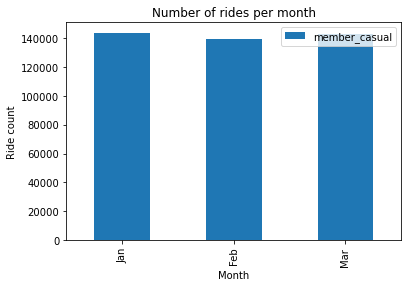

In [30]:
plot = dataset_month_rides_pivot.plot(kind = 'bar')
plot.set_title('Number of rides per month')
plot.set_xlabel('Month')
plot.set_ylabel('Ride count')
plot.set_xticklabels(['Jan','Feb','Mar'])

In [31]:
## Total duration of rides per month
dataset_month_duration_pivot = dataset.pivot_table(index = dataset.started_at.astype('datetime64[M]'), values = "time_taken", aggfunc = "sum")

[Text(0, 0, 'Jan'), Text(1, 0, 'Feb'), Text(2, 0, 'Mar')]

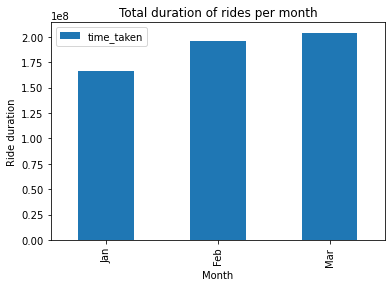

In [32]:
plot = dataset_month_duration_pivot.astype('timedelta64[s]').plot(kind='bar')
plot.set_title('Total duration of rides per month')
plot.set_xlabel('Month')
plot.set_ylabel('Ride duration')
plot.set_xticklabels(['Jan','Feb','Mar'])

In [33]:
## Number of rides per day of week
dataset_dayofweek_rides_pivot = dataset.pivot_table(index = (dataset.started_at.astype('datetime64[D]').view('int64') -4) %7, values = "member_casual", aggfunc = "count")

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

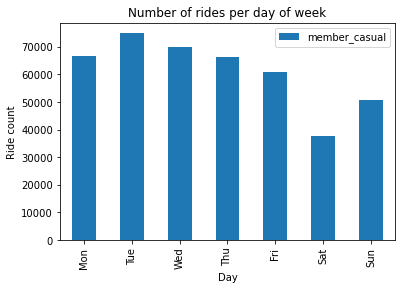

In [34]:
plot = dataset_dayofweek_rides_pivot.plot(kind = "bar")
plot.set_title('Number of rides per day of week')
plot.set_xlabel('Day')
plot.set_ylabel('Ride count')
plot.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

# Predictive Analytics

In [35]:
dataset.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_covered,time_taken
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member,1.737499,0 days 00:07:31
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member,0.833411,0 days 00:03:43
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member,0.620437,0 days 00:02:51
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member,1.231236,0 days 00:08:49
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member,0.783624,0 days 00:05:32


### Feature Engineering

In [36]:
##### ride_id - 
# It is a column which is used to uniquely identify a ride. Hence we can remove the feature for modelling.

##### rideable_type - 
dataset["rideable_type"].unique()
# has the same value for all rides - docked_bike. Hence we can remove the feature for modelling.

##### start_station_name and end_station_name -
# The same information is contained in the IDs. Hence we can remove the feature for modelling.

#### start_station_id and end_station_id -
# Think about it. Does Start and End station IDs or Names add any more information? Or is it already available in 
# start_lat, start_lng, end_lat, end_lng data? From a human perspective, it adds more information. But from a 
# Model's perspective, these features are redundent. Since the same information is already present in the coordinates.

##### distance_covered and time_taken -
# This information is contained in the other variables already. Hence we can remove the feature for modelling.

array(['docked_bike'], dtype=object)

In [37]:
rides = dataset.iloc[:,[2,3,8,9,10,11,12]]
rides.head()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,2020-01-21 20:06:59,2020-01-21 20:14:30,41.9665,-87.6884,41.9671,-87.6674,member
1,2020-01-30 14:22:39,2020-01-30 14:26:22,41.9616,-87.6660,41.9542,-87.6644,member
2,2020-01-09 19:29:26,2020-01-09 19:32:17,41.9401,-87.6455,41.9402,-87.6530,member
3,2020-01-06 16:17:07,2020-01-06 16:25:56,41.8846,-87.6319,41.8918,-87.6206,member
4,2020-01-30 08:37:16,2020-01-30 08:42:48,41.8856,-87.6418,41.8899,-87.6343,member


Will we be able to predict if a customer is member or casual from dates and location data? From the exploratory analysis, we have seen that both categories use the service differently, which means that we can predict but how accurately we can predict is something we have to see.

### Preprocessing

In [38]:
# Encoding the dependent variable - member_casual
# casual = 0, member = 1
rides.loc[:,('member_casual')] = (rides.loc[:,('member_casual')] == 'member').astype('int')
rides.head()

C:\Users\hp\anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,2020-01-21 20:06:59,2020-01-21 20:14:30,41.9665,-87.6884,41.9671,-87.6674,1
1,2020-01-30 14:22:39,2020-01-30 14:26:22,41.9616,-87.6660,41.9542,-87.6644,1
2,2020-01-09 19:29:26,2020-01-09 19:32:17,41.9401,-87.6455,41.9402,-87.6530,1
3,2020-01-06 16:17:07,2020-01-06 16:25:56,41.8846,-87.6319,41.8918,-87.6206,1
4,2020-01-30 08:37:16,2020-01-30 08:42:48,41.8856,-87.6418,41.8899,-87.6343,1


In [39]:
rides['started_at_month'] = rides['started_at'].dt.month
rides['started_at_day'] = rides['started_at'].dt.day
rides['started_at_hour'] = rides['started_at'].dt.hour
rides['started_at_minute'] = rides['started_at'].dt.minute


C:\Users\hp\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [40]:
rides['ended_at_month'] = rides['ended_at'].dt.month
rides['ended_at_day'] = rides['ended_at'].dt.day
rides['ended_at_hour'] = rides['ended_at'].dt.hour
rides['ended_at_minute'] = rides['ended_at'].dt.minute

C:\Users\hp\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [41]:
rides = rides.loc[:,('start_lat','start_lng','end_lat','end_lng','started_at_month','started_at_day','started_at_hour','started_at_minute','ended_at_month','ended_at_day','ended_at_hour','ended_at_minute','member_casual')]
rides.head()

,start_lat,start_lng,end_lat,end_lng,started_at_month,started_at_day,started_at_hour,started_at_minute,ended_at_month,ended_at_day,ended_at_hour,ended_at_minute,member_casual
0,41.9665,-87.6884,41.9671,-87.6674,1,21,20,6,1,21,20,14,1
1,41.9616,-87.6660,41.9542,-87.6644,1,30,14,22,1,30,14,26,1
2,41.9401,-87.6455,41.9402,-87.6530,1,9,19,29,1,9,19,32,1
3,41.8846,-87.6319,41.8918,-87.6206,1,6,16,17,1,6,16,25,1
4,41.8856,-87.6418,41.8899,-87.6343,1,30,8,37,1,30,8,42,1


In [42]:
#dividing the dataset into independent and dependent variables
x = rides.iloc[:,:-1].values
y = rides.iloc[:,-1].values

In [43]:
# Balance the dataset for modelling and prediction
print('records classified as 0 - ',(y == 0).sum())
print('records classified as 1 - ',(y == 1).sum())

records classified as 0 -  48479
records classified as 1 -  378407


In [44]:
#import imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 42,replacement = True)
x_rus, y_rus = rus.fit_resample(x, y)

In [45]:
print('records classified as 0 after balancing - ',(y_rus == 0).sum())
print('records classified as 1 after balancing - ',(y_rus == 1).sum())

records classified as 0 after balancing -  48479
records classified as 1 after balancing -  48479


In [46]:
# splitting the dataset into training and test datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_rus,y_rus,test_size = 0.2,random_state = 0)

print('x_train - ',x_train.shape)
print('x_test - ',x_test.shape)
print('y_train - ',y_train.shape)
print('y_test - ',y_test.shape)

x_train -  (77566, 12)
x_test -  (19392, 12)
y_train -  (77566,)
y_test -  (19392,)


In [47]:
# feature selection
# information gain using mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances = mutual_info_classif(x,y)

<AxesSubplot:>

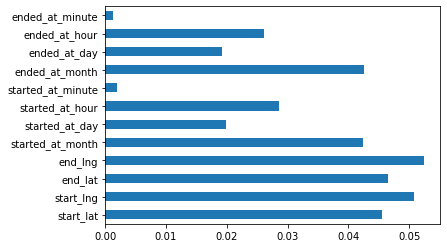

In [48]:
importances1 = pd.Series(importances,rides.columns[0:len(rides.columns)-1])
importances1.plot(kind = 'barh')

# Model

### Logistic Regression

In [49]:
# Training the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [50]:
# Predicting the test results
y_pred = classifier.predict(x_test)

In [51]:
# Measuring the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
ac = accuracy_score(y_test,y_pred)
print(ac)

[[6213 3475]
 [3721 5983]]
0.6289191419141914


### KNN Classification

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
# Predicting the test results
y_pred = classifier.predict(x_test)

In [54]:
# Measuring the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
ac = accuracy_score(y_test,y_pred)
print(ac)

[[7107 2581]
 [2293 7411]]
0.7486592409240924


### SVM Classification

In [55]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 42)
classifier.fit(x_train,y_train)

SVC(random_state=42)

In [56]:
# Predicting the test results
y_pred = classifier.predict(x_test)

In [57]:
# Measuring the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
ac = accuracy_score(y_test,y_pred)
print(ac)

[[6859 2829]
 [3559 6145]]
0.670585808580858


### Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 42)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [59]:
# Predicting the test results
y_pred = classifier.predict(x_test)

In [60]:
# Measuring the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
ac = accuracy_score(y_test,y_pred)
print(ac)

[[7393 2295]
 [2487 7217]]
0.7534034653465347


### Random Forest Classification

In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 42)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [62]:
# Predicting the test results
y_pred = classifier.predict(x_test)

In [63]:
# Measuring the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
ac = accuracy_score(y_test,y_pred)
print(ac)

[[7753 1935]
 [2187 7517]]
0.7874381188118812


### Model Accuracy:
##### Logistic Regression : 62.8%
##### KNN Classification : 74.8%
##### SVM Classification : 67%
##### Decision Tree Classifier : 75.3%
##### Random Forest Classification : 78.7%

Model is able to classify the riders with good enough accuracy, which suggests that casual riders and member riders might be using the service differently. 
From exploratory data analysis, we came to know that casual riders use the service for long duration rides whereas member users use the service for short duration rides more efficiently.